In [18]:
import pandas as pd
import numpy as np

df= pd.read_csv("bank-additional-full.csv", delimiter=";")

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
cols_to_drop= ["duration", "cons.conf.idx", "cons.price.idx", "euribor3m", "nr.employed"]
df= df.drop(columns= cols_to_drop)

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,no


In [22]:
df=df.rename(columns= {"job": "job_type", "default":"default_status", 
                       "housing":"housing_loan_status", "loan": "personal_loan_status",
                      "contact":"contact_type", "month":"contact_month", "day_of_week":"contact_day_of_week",
                       "campaign": "num_contacts","pdays":"days_last_contact", "previous":"previous_contacts",
                       "poutcome":"previous_outcome",
                       "y":"result"
                      })

In [23]:
df["result"]= df["result"].replace({"yes":1,"no":0})

/var/folders/09/89r30_ms6xdcd7znk61plqgr0000gn/T/ipykernel_25224/935727832.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["result"]= df["result"].replace({"yes":1,"no":0})


In [24]:
df.head()

,age,job_type,marital,education,default_status,housing_loan_status,personal_loan_status,contact_type,contact_month,contact_day_of_week,num_contacts,days_last_contact,previous_contacts,previous_outcome,emp.var.rate,result
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41188 non-null  int64  
 1   job_type              41188 non-null  object 
 2   marital               41188 non-null  object 
 3   education             41188 non-null  object 
 4   default_status        41188 non-null  object 
 5   housing_loan_status   41188 non-null  object 
 6   personal_loan_status  41188 non-null  object 
 7   contact_type          41188 non-null  object 
 8   contact_month         41188 non-null  object 
 9   contact_day_of_week   41188 non-null  object 
 10  num_contacts          41188 non-null  int64  
 11  days_last_contact     41188 non-null  int64  
 12  previous_contacts     41188 non-null  int64  
 13  previous_outcome      41188 non-null  object 
 14  emp.var.rate          41188 non-null  float64
 15  result             

In [26]:
df["result"].value_counts()

result
0    36548
1     4640
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X=df.drop(columns= "result")
y= df["result"]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=.2, stratify=y, random_state=8)

In [28]:
from xgboost import XGBClassifier


Building a pipeline of training

In [29]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators= [
    ("encoder", TargetEncoder()),
    ("clf", XGBClassifier(random_state=8))
]
pipe= Pipeline(steps=estimators)
pipe

,steps,"[('encoder', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,None
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,min_samples_leaf,20


Setting up hyperparameter turnig

In [30]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
search_space={
    "clf__maxdepth" : Integer(2,8),
    "clf__learning_rate" : Real(0.001, 1.0, prior="log-uniform"),
    "clf__subsample" : Real (0.5, 1.0),
    "clf__colsample_bytree": Real(.5,1),
    "clf__colsample_bylevel": Real(.5,1),
    "clf__colsample_bynode": Real(.5,1),
    "clf__reg_alpha": Real(0.0,10.0),
    "clf__reg_lambda": Real(0.0,10.0),
    "clf__gamma": Real(0.0,10.0)
}
opt= BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring= "roc_auc", random_state=8)
# in the future set cv and 10 higher, but run time will be longer

Train the XGBoost model

In [31]:
opt.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:58:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "maxdepth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:58:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "maxdepth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:58:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "maxdepth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:58:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "maxdepth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/pytho

,estimator,"Pipeline(step...=None, ...))])"
,search_spaces,"{'clf__colsample_bylevel': Real(low=0.5,...m='normalize'), 'clf__colsample_bynode': Real(low=0.5,...m='normalize'), 'clf__colsample_bytree': Real(low=0.5,...m='normalize'), 'clf__gamma': Real(low=0.0,...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,10
,scoring,'roc_auc'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,3


Evaluating the Performance

In [32]:
opt.best_score_

0.7876686704302358

In [33]:
opt.score(X_test,y_test)

0.8022745766309731

In [36]:
opt.predict_proba(X_test)

array([[0.9568382 , 0.04316182],
       [0.95921075, 0.04078924],
       [0.9593732 , 0.0406268 ],
       ...,
       [0.614427  , 0.385573  ],
       [0.95628285, 0.04371715],
       [0.8004676 , 0.1995324 ]], dtype=float32)

Measure feature importance

In [37]:
opt.best_estimator_.steps

[('encoder',
  TargetEncoder(cols=['job_type', 'marital', 'education', 'default_status',
                      'housing_loan_status', 'personal_loan_status',
                      'contact_type', 'contact_month', 'contact_day_of_week',
                      'previous_outcome'])),
 ('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.9425384185492701,
                colsample_bynode=0.9095956806239844,
                colsample_bytree=0.706128679361455, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=1.6598135411398998, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.7929828265552742,
                max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None, maxdepth=7,
       

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

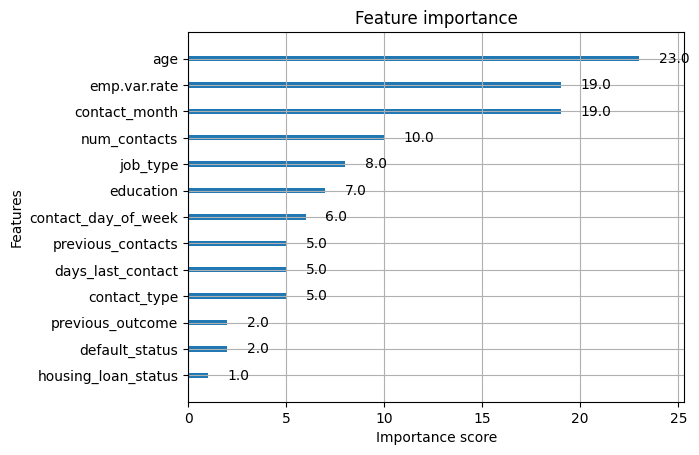

In [39]:
from xgboost import plot_importance
xgboost_step=opt.best_estimator_.steps[1]
xgboost_model=xgboost_step[1]
plot_importance(xgboost_model)